Reproduce Figure 2 from [Online Kernel CUSUM for Change-Point Detection](https://arxiv.org/pdf/2211.15070).

In [1]:
import numpy as np
from mmdew.detectors import FastOKCUSUM, ScanBStatistic
import seaborn as sns
from tqdm import tqdm
import pandas as pd

In [3]:
rng = np.random.default_rng()

In [4]:
d=20

In [8]:
df = pd.DataFrame()

for _ in tqdm(range(100)):
    ref = rng.normal(size=(1000,d))

    okcusum = FastOKCUSUM(ref, B_max=50, N=15, B_min=2)
    scanb = ScanBStatistic(ref, B0=50, N=15)
    
    h0 = rng.normal(size=(50,d))
    h1 = np.where((rng.uniform(size=80)>0.3).reshape(-1,1), rng.normal(scale=2,size=(80,d)), rng.normal(size=(80,d)))
    
    data = np.concatenate((h0,h1))
    
    for elem in data:
        okcusum.add_element(elem.reshape(1,-1))
        scanb.add_element(elem.reshape(1,-1))
    
    df_cusum = pd.DataFrame({ "algorithm" : ["OKCUSUM"]*130,
                              "stats"     : okcusum.stats,
                              "id"        : np.arange(0,130)
                            })
    
    df_scanb = pd.DataFrame({ "algorithm" : ["ScanB"]*130,
                              "stats"     : scanb.stats,
                              "id"        : np.arange(0,130)
                            })
    
    df = pd.concat((df, df_cusum, df_scanb))    

100%|█████████████████████████████████████████| 100/100 [07:18<00:00,  4.39s/it]


<Axes: xlabel='id', ylabel='stats'>

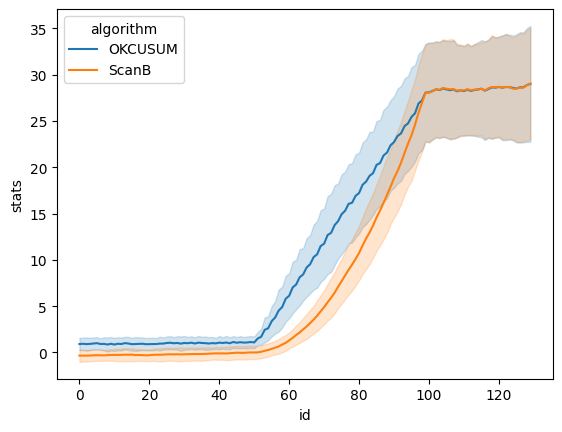

In [10]:
sns.lineplot(data=df, x="id", y="stats", hue="algorithm", errorbar="sd")